In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [185]:
data = dict()
for quality in (5, 20, 40, 60, 80, 95):
    with open(f'/home/michal/h4h_team5/model/results/result_400_jpeg_{quality}.pickle', 'rb') as fin:
        data[quality] = pickle.load(fin)

In [186]:
for k in data.keys():
    for t in ('train', 'val'):
        tmp = []
        for i, cmat in enumerate(data[k]['cmats'][t]):
            tmp.append(np.diag(cmat).sum() / np.sum(cmat))
        data[k]['accs'][t] = tmp

In [187]:
data[k].keys()

dict_keys(['cmats', 'losses', 'accs', 'b_loss', 'b_acc', 'prec', 'rec', 'f1', 'prec_avg', 'rec_avg', 'f1_avg'])

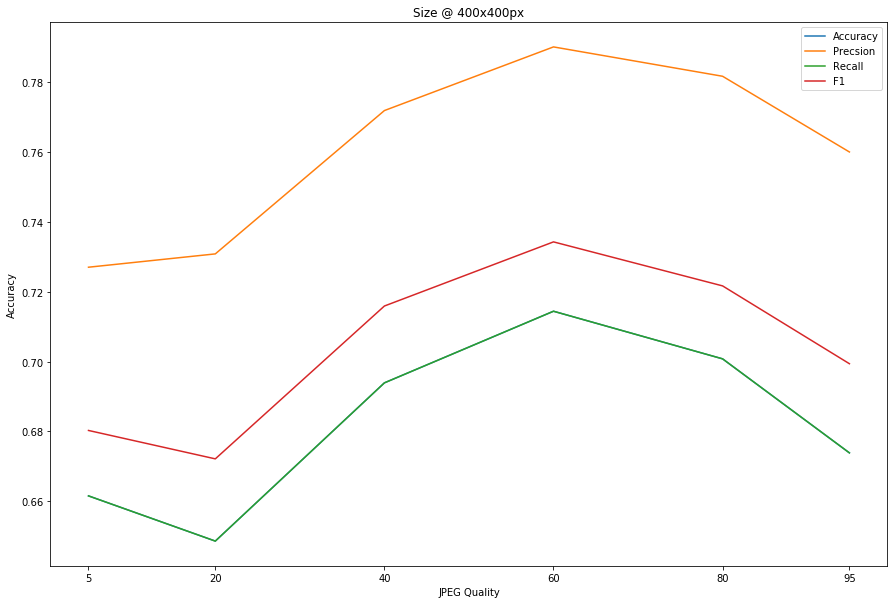

In [192]:
fig, ax = plt.subplots(figsize=(15, 10))
x = []
ys = []
for k in data.keys():
    x.append(k)
    ys.append([data[k]['accs']['val'][-1],
               data[k]['prec_avg']['val'][-1],
               data[k]['rec_avg']['val'][-1],
               data[k]['f1_avg']['val'][-1]])
ys = np.array(ys).T    
for name, y in zip(['Accuracy', 'Precsion', 'Recall', 'F1'], ys):
    ax.plot(x, y, label=name)
ax.set_xticks([5, 20, 40, 60, 80, 95])
ax.set_xlabel('JPEG Quality')
ax.set_ylabel('Accuracy')
ax.set_title('Size @ 400x400px')
ax.legend()

In [108]:
data[k]['f1_avg']['val']

[0.7761588998916648,
 0.7682110410909584,
 0.7449319783500477,
 0.7581149353751608,
 0.7414145214628687,
 0.7313606911369348,
 0.7141909069946863,
 0.7083645676824161,
 0.713828174803281,
 0.6993972997740068]

In [76]:
cmat = data['cmats']['val'][-1]

In [77]:
import numpy as np

In [78]:
np.diag(cmat).sum() / np.sum(cmat)

0.6485727387366732